In [19]:
from utils import * 
from model import *

import matplotlib.pyplot as plt 

import torch 

In [22]:
class args:
    batch_size = 128 
    device = get_device('mps')
    input_dim = 784
    hidden_dim = 400 
    latent_dim = 200
    lr = 1e-3
    
def show_image(x, idx):
    x = x.view(-1, 28, 28)
    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())

test_loader = get_loader(args, type='test')

encoder = Encoder(args.input_dim, args.hidden_dim, args.latent_dim)
decoder = Decoder(args.latent_dim, args.hidden_dim, args.input_dim)

model = VAE(args, encoder, decoder).to(args.device)

model_path = os.path.join(
    os.path.join(os.getcwd(), 
                 'model_parameters'), f'VAE-lr{args.lr}-batch{args.batch_size}-h{args.hidden_dim}-lt{args.latent_dim}.pt')
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [23]:
with torch.no_grad():
    for x, label in test_loader:
        x = torch.flatten(x, start_dim=1)
        x = x.to(args.device)
        
        x_hat, _, _ = model(x)
        
        break 


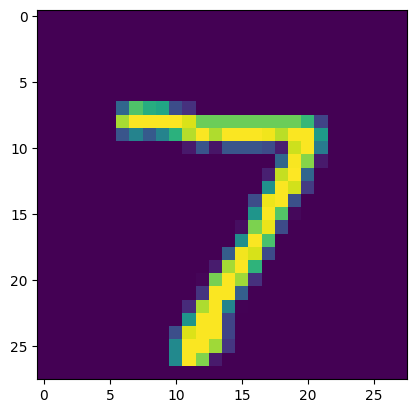

In [24]:
show_image(x, idx=0)

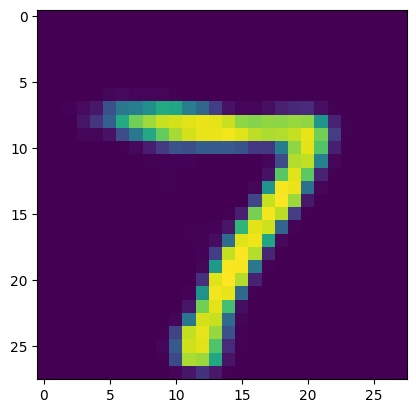

In [25]:
show_image(x_hat, idx=0)

### Generated_images 

In [26]:
with torch.no_grad():
    noise = torch.randn(args.batch_size, args.latent_dim).to(args.device)
    generated_images = decoder(noise)

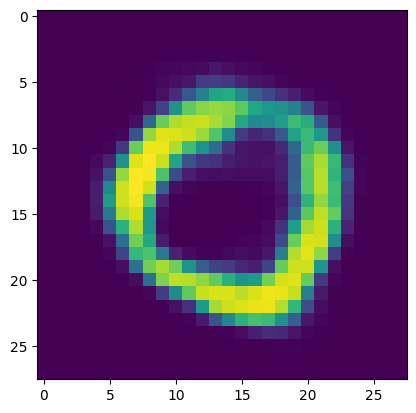

In [27]:
show_image(generated_images, idx=12)